<a href="https://colab.research.google.com/github/cris-her/AI/blob/master/nlp_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
nltk.download('cess_esp')

[nltk_data] Downloading package cess_esp to /root/nltk_data...
[nltk_data]   Package cess_esp is already up-to-date!


True

## Expresiones regulares

In [2]:
import re
corpus = nltk.corpus.cess_esp.sents()
print(corpus)
print(len(corpus))

[['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',', 'jueves', ',', 'la', 'compra', 'del', '51_por_ciento', 'de', 'la', 'empresa', 'mexicana', 'Electricidad_Águila_de_Altamira', '-Fpa-', 'EAA', '-Fpt-', ',', 'creada', 'por', 'el', 'japonés', 'Mitsubishi_Corporation', 'para', 'poner_en_marcha', 'una', 'central', 'de', 'gas', 'de', '495', 'megavatios', '.'], ['Una', 'portavoz', 'de', 'EDF', 'explicó', 'a', 'EFE', 'que', 'el', 'proyecto', 'para', 'la', 'construcción', 'de', 'Altamira_2', ',', 'al', 'norte', 'de', 'Tampico', ',', 'prevé', 'la', 'utilización', 'de', 'gas', 'natural', 'como', 'combustible', 'principal', 'en', 'una', 'central', 'de', 'ciclo', 'combinado', 'que', 'debe', 'empezar', 'a', 'funcionar', 'en', 'mayo_del_2002', '.'], ...]
6030


In [3]:
flatten = [w for l in corpus for w in l]
print(f'flaten contiene {len(flatten)} tokens')
print(flatten[:10])

flaten contiene 192685 tokens
['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',']


## Estructura de la funcion re.search()

In [4]:
arr = [w for w in flatten if re.search('es', w)]
print(arr[:5])

['estatal', 'jueves', 'empresa', 'centrales', 'francesa']


In [5]:
arr = [w for w in flatten if re.search('es$', w)]
print(arr[:5])

['jueves', 'centrales', 'millones', 'millones', 'dólares']


In [6]:
arr = [w for w in flatten if re.search('^es', w)]
print(arr[:5])

['estatal', 'es', 'esta', 'esta', 'eso']


In [7]:
arr = [w for w in flatten if re.search('^[ghi]', w)]
print(arr[:10])

['grupo', 'hoy', 'gas', 'gas', 'intervendrá', 'invertir', 'gas', 'hoy', 'insulto', 'intervención']


In [8]:
arr = [w for w in flatten if re.search('^(no)*', w)]
print(arr[:10])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',']


In [9]:
arr = [w for w in flatten if re.search('^(no)+', w)]
print(arr[:10])

['norte', 'no', 'no', 'noche', 'no', 'no', 'notificación', 'no', 'no', 'no']


## Normalizacion de texto (como aplicacion de la expresiones regulares)

In [10]:
print('esta es \n una prueba')

esta es 
 una prueba


In [11]:
print(r'esta es \n una prueba')

esta es \n una prueba


In [12]:
texto = """ Cuando sea el rey del mundo (imaginaba el en su cabeza) no tendre que  preocuparme por estas bobadas.
        Era solo un niño de 7 años, pero pensaba que podria ser cualquier cosa que su imaginacion le permitiera
        visualizar en su cabeza ..."""

In [13]:
print(re.split(r' ', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'el', 'en', 'su', 'cabeza)', 'no', 'tendre', 'que', '', 'preocuparme', 'por', 'estas', 'bobadas.\n', '', '', '', '', '', '', '', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podria', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginacion', 'le', 'permitiera\n', '', '', '', '', '', '', '', 'visualizar', 'en', 'su', 'cabeza', '...']


In [14]:
print(re.split(r'[ \t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', '(imaginaba', 'el', 'en', 'su', 'cabeza)', 'no', 'tendre', 'que', 'preocuparme', 'por', 'estas', 'bobadas.', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años,', 'pero', 'pensaba', 'que', 'podria', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginacion', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '...']


In [15]:
print(re.split(r'[ \W\t\n]+', texto))

['', 'Cuando', 'sea', 'el', 'rey', 'del', 'mundo', 'imaginaba', 'el', 'en', 'su', 'cabeza', 'no', 'tendre', 'que', 'preocuparme', 'por', 'estas', 'bobadas', 'Era', 'solo', 'un', 'niño', 'de', '7', 'años', 'pero', 'pensaba', 'que', 'podria', 'ser', 'cualquier', 'cosa', 'que', 'su', 'imaginacion', 'le', 'permitiera', 'visualizar', 'en', 'su', 'cabeza', '']


## Tokenizador de NLTK

In [16]:
texto = 'En los E.U. esa postal vale $15.50 ...'
print(re.split(r'[ \W\t\n]+', texto))

['En', 'los', 'E', 'U', 'esa', 'postal', 'vale', '15', '50', '']


In [17]:
pattern = r'''(?x)
              (?:[A-Z]\.)+
              | \w+(?:-\w+)*
              | \$?\d+(?:\.\d+)?%?
              | \.\.\.
              | [][.,;"'?():-_`]
'''

nltk.regexp_tokenize(texto, pattern)

['En', 'los', 'E.U.', 'esa', 'postal', 'vale', '$15.50', '...']

## Analizando un texto

In [18]:
import matplotlib.pyplot as plt
import numpy as np

nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [19]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [20]:
text1.tokens[:10]

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [21]:
len(text1)

260819

## Medida de riqueza lexica en un texto

In [22]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1050])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts', 'Cruelty', 'Cruising', 'Cruppered', 'Crusaders', 'Crushed', 'Crying', 'Cuba', 'Curious', 'Curse', 'Cursed', 'Curses', 'Cussed', 'Customs', 'Cut', 'Cutter', 'Cutting', 'Cuvier', 'Cyclades', 'Czar', 'D', 'DAGGOO', 'DAM', 'DANCE', 'DANCING', 'DANIEL', 'DANISH', 'DARKENS', 'DARWIN', 'DAVENANT', 'DEAD', 'DEATH', 'DEBELL', 'DECK', 'DEL', 'DESTROYED', 'DEVIL', 'DICTIONARY', 'DID', 'DIGNITY', 'DISCOVERS']


In [23]:
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [24]:
def riqueza_lexica(texto):
  vocabulario = sorted((set(text1)))
  return len(vocabulario)/len(text1)

riqueza_lexica(text1)

0.07406285585022564

In [25]:
def porcentaje_palabra(palabra, texto):
  return 100*texto.count(palabra)/len(texto)

In [26]:
porcentaje_palabra('monster', text1)

0.018786974875296663

In [27]:
text1.count('monster')

49

## Estadisticas del Lenguaje

In [28]:
dic = {}
for palabra in set(text1):
  dic[palabra] = text1.count(palabra)
dic

{'philanthropists': 1,
 'index': 2,
 'Surgeon': 2,
 'previously': 17,
 'delicious': 3,
 'strawberries': 1,
 'AFTER': 1,
 'cheerless': 3,
 'nomine': 2,
 'Since': 2,
 'Lion': 1,
 'lists': 1,
 'eccentric': 1,
 'outnumber': 1,
 'canonized': 1,
 'cock': 4,
 'most': 277,
 'Bartholomew': 1,
 'Cods': 1,
 'thenceforth': 1,
 'lunar': 1,
 'furiously': 6,
 'untattooed': 1,
 'JOHNSON': 1,
 'riding': 3,
 'undulation': 1,
 'strands': 2,
 'C': 1,
 'drive': 17,
 'sack': 1,
 'plan': 11,
 'running': 44,
 'rush': 18,
 'Hackluyt': 2,
 'Ottoman': 4,
 'Almanack': 1,
 'Divine': 2,
 'circulating': 1,
 'Cadiz': 4,
 'preaching': 3,
 'individual': 13,
 'embark': 5,
 'imbibing': 1,
 'assisted': 2,
 'Sumatra': 6,
 'oily': 4,
 'rubbed': 3,
 'thinkers': 1,
 'degrees': 5,
 'Indiamen': 1,
 'villainies': 1,
 'lasso': 1,
 'according': 20,
 'whole': 136,
 'chiefs': 1,
 'ungodly': 3,
 'mutinying': 1,
 'cathedrals': 2,
 'aint': 3,
 'ANY': 1,
 'Heidelburgh': 8,
 'inordinate': 3,
 'obscuring': 1,
 'story': 47,
 'floats': 11,


## Metodo FreqDist de NLTK

In [29]:
fdist = FreqDist(text1)

In [30]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

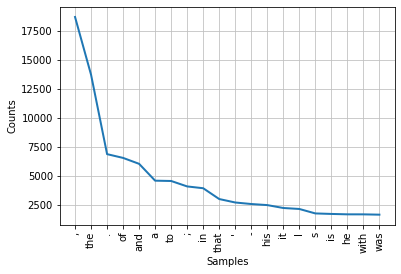

In [31]:
fdist.plot(20)

In [32]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino

In [33]:
long_words = [palabra for palabra in text1 if len(palabra) > 5]
long_words[:10]

['Herman',
 'Melville',
 'ETYMOLOGY',
 'Supplied',
 'Consumptive',
 'Grammar',
 'School',
 'threadbare',
 'dusting',
 'lexicons']

In [34]:
vocabulario_filtrado = sorted(set(long_words))
print(vocabulario_filtrado[:10])
print(len(vocabulario_filtrado))

['ACCOUNT', 'ADDITIONAL', 'ADVANCING', 'ADVENTURES', 'AFFGHANISTAN', 'AFRICA', 'AGAINST', 'ALFRED', 'ALGERINE', 'AMERICA']
14180


In [35]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
palabras_interesantes[:10]

[('previously', 17),
 ('running', 44),
 ('individual', 13),
 ('according', 20),
 ('floats', 11),
 ('tossed', 31),
 ('gained', 14),
 ('thinking', 25),
 ('Elijah', 15),
 ('mounted', 13)]

In [36]:
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)

In [37]:
palabras_interesantes = np.sort(palabras_interesantes, order = 'frequency')
palabras_interesantes[::20]

array([(b'America',  11), (b'blessed',  11), (b'fashioned',  11),
       (b'leading',  11), (b'reasons',  11), (b'straits',  11),
       (b'Derick',  12), (b'descend',  12), (b'howling',  12),
       (b'murmured',  12), (b'stranded',  12), (b'dangerous',  13),
       (b'moving',  13), (b'silver',  13), (b'behold',  14),
       (b'frequently',  14), (b'probably',  14), (b'boiling',  15),
       (b'horizontal',  15), (b'secured',  15), (b'barrels',  16),
       (b'foolish',  16), (b'putting',  16), (b'compass',  17),
       (b'previously',  17), (b'engaged',  18), (b'picture',  18),
       (b'deeper',  19), (b'terrors',  19), (b'officers',  20),
       (b'quickly',  21), (b'windward',  22), (b'somewhere',  23),
       (b'secret',  24), (b'thinking',  25), (b'yourself',  26),
       (b'command',  28), (b'possibly',  29), (b'leviathan',  31),
       (b'rigging',  33), (b'rolling',  35), (b'carpenter',  39),
       (b'seamen',  43), (b'stranger',  48), (b'savage',  54),
       (b'morning', 

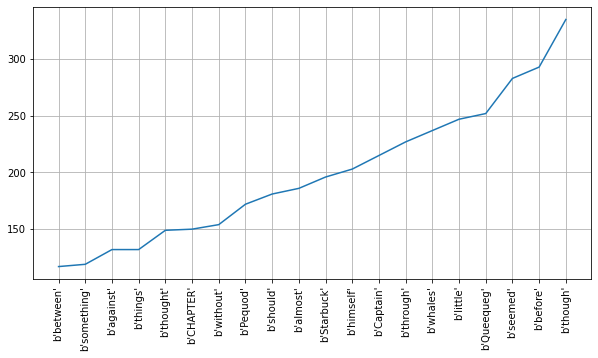

In [38]:
top_words = 20
x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]
plt.figure(figsize= (10,5))
plt.plot(x,y)
plt.xticks(x, [str(freq[0]) for freq in palabras_interesantes[-top_words:]], rotation='vertical')
plt.grid(True)
plt.show()

In [39]:
[str(freq[0]) for freq in palabras_interesantes[-top_words:]]

["b'between'",
 "b'something'",
 "b'against'",
 "b'things'",
 "b'thought'",
 "b'CHAPTER'",
 "b'without'",
 "b'Pequod'",
 "b'should'",
 "b'almost'",
 "b'Starbuck'",
 "b'himself'",
 "b'Captain'",
 "b'through'",
 "b'whales'",
 "b'little'",
 "b'Queequeg'",
 "b'seemed'",
 "b'before'",
 "b'though'"]

## Bi-gramas

In [40]:
import pandas as pd
import plotly.express as px

In [41]:
list(bigrams(text1))[:20]

[('[', 'Moby'),
 ('Moby', 'Dick'),
 ('Dick', 'by'),
 ('by', 'Herman'),
 ('Herman', 'Melville'),
 ('Melville', '1851'),
 ('1851', ']'),
 (']', 'ETYMOLOGY'),
 ('ETYMOLOGY', '.'),
 ('.', '('),
 ('(', 'Supplied'),
 ('Supplied', 'by'),
 ('by', 'a'),
 ('a', 'Late'),
 ('Late', 'Consumptive'),
 ('Consumptive', 'Usher'),
 ('Usher', 'to'),
 ('to', 'a'),
 ('a', 'Grammar'),
 ('Grammar', 'School')]

In [42]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

In [43]:
fdist.most_common(10)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908),
 ((';', 'and'), 853),
 (('to', 'the'), 712),
 (('.', 'But'), 596),
 ((',', 'that'), 584),
 (('.', '"'), 557)]

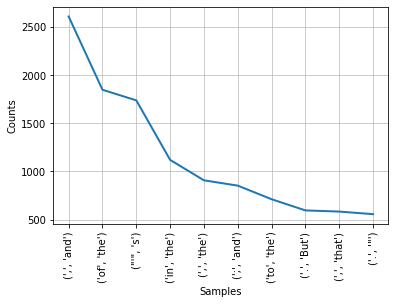

In [44]:
fdist.plot(10)

## Filtrado de bi-gramas

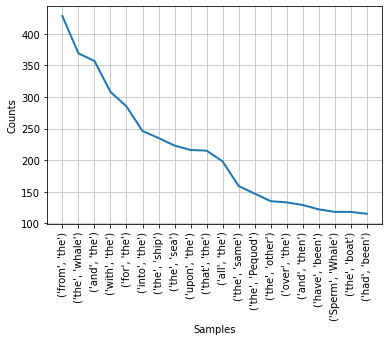

In [45]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])> threshold and len(bigram[1])>threshold]
filtered_dist =FreqDist(filtered_bigrams)
filtered_dist.plot(20)

## Tri-gramas

In [46]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)
fdist.most_common(10)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87),
 (('whale', "'", 's'), 81),
 (('.', 'It', 'was'), 81),
 (('ship', "'", 's'), 80),
 (('the', 'Sperm', 'Whale'), 77),
 ((',', 'as', 'if'), 76)]

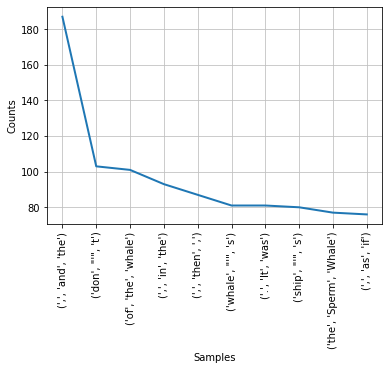

In [47]:
fdist.plot(10)

## Collocations (Colocaciones)

In [48]:
md_bigrams = list(bigrams(text1))

threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0])> threshold and len(bigram[1])>threshold]
filtered_bigram_dist = FreqDist(filtered_bigrams)

filtered_words = [word for word in text1 if len(word)> threshold]
filtered_word_dist = FreqDist(filtered_words)

df = pd.DataFrame()
df['bi_grams'] = list(set(filtered_bigrams))
df['word_0'] = df['bi_grams'].apply(lambda x: x[0])
df['word_1'] = df['bi_grams'].apply(lambda x: x[1])

df['bi_grams_freq'] = df['bi_grams'].apply(lambda x: filtered_bigram_dist[x])
df['word_0_freq'] = df['word_0'].apply(lambda x: filtered_word_dist[x])
df['word_1_freq'] = df['word_1'].apply(lambda x: filtered_word_dist[x])

In [49]:
df

bi_grams       word_0  ... word_0_freq  word_1_freq
0               (more, strove)         more  ...         501            8
1               (flukes, with)       flukes  ...          36         1659
2                 (other, are)        other  ...         412          586
3         (present, connexion)      present  ...          80            8
4            (powerfully, did)   powerfully  ...           1          246
...                        ...          ...  ...         ...          ...
67937           (dashes, even)       dashes  ...           2          181
67938        (and, cheeseries)          and  ...        6024            1
67939         (reviewed, them)     reviewed  ...           1          471
67940            (the, Temple)          the  ...       13721            7
67941  (excessively, unctuous)  excessively  ...           1            7

[67942 rows x 6 columns]

## Pointwise Mutual Information (PMI)

In [50]:
df['PMI'] = df[['bi_grams_freq', 'word_0_freq', 'word_1_freq']].apply(lambda x: np.log2(x.values[0]/(x.values[1]*x.values[2])), axis = 1)
df

bi_grams       word_0  ... word_1_freq        PMI
0               (more, strove)         more  ...           8 -10.968667
1               (flukes, with)       flukes  ...        1659 -15.866023
2                 (other, are)        other  ...         586 -17.881257
3         (present, connexion)      present  ...           8  -9.321928
4            (powerfully, did)   powerfully  ...         246  -7.942515
...                        ...          ...  ...         ...        ...
67937           (dashes, even)       dashes  ...         181  -8.499846
67938        (and, cheeseries)          and  ...           1 -12.556506
67939         (reviewed, them)     reviewed  ...         471  -8.879583
67940            (the, Temple)          the  ...           7 -14.551453
67941  (excessively, unctuous)  excessively  ...           7  -2.807355

[67942 rows x 7 columns]

In [51]:
df.sort_values(by = 'PMI', ascending = False)

bi_grams      word_0  ... word_1_freq        PMI
57486          (returne, againe)     returne  ...           1   0.000000
34585    (ironical, coincidings)    ironical  ...           1   0.000000
42097          (funereal, pyres)    funereal  ...           1   0.000000
38980  (wealthiest, Praetorians)  wealthiest  ...           1   0.000000
34141      (ruptured, membranes)    ruptured  ...           1   0.000000
...                          ...         ...  ...         ...        ...
1792                  (man, the)         man  ...       13721 -22.732783
52830                (some, the)        some  ...       13721 -22.919024
25986                 (one, the)         one  ...       13721 -23.540138
61832                 (the, not)         the  ...        1103 -23.851315
30765                 (the, but)         the  ...        1113 -23.864336

[67942 rows x 7 columns]

In [52]:
df['log(bi_gram_freq)'] = df['bi_grams_freq'].apply(lambda x: np.log2(x))
df

bi_grams       word_0  ...        PMI  log(bi_gram_freq)
0               (more, strove)         more  ... -10.968667                1.0
1               (flukes, with)       flukes  ... -15.866023                0.0
2                 (other, are)        other  ... -17.881257                0.0
3         (present, connexion)      present  ...  -9.321928                0.0
4            (powerfully, did)   powerfully  ...  -7.942515                0.0
...                        ...          ...  ...        ...                ...
67937           (dashes, even)       dashes  ...  -8.499846                0.0
67938        (and, cheeseries)          and  ... -12.556506                0.0
67939         (reviewed, them)     reviewed  ...  -8.879583                0.0
67940            (the, Temple)          the  ... -14.551453                2.0
67941  (excessively, unctuous)  excessively  ...  -2.807355                0.0

[67942 rows x 8 columns]

In [53]:
fig = px.scatter(x = df['PMI'].values, y = df['log(bi_gram_freq)'], color = df['PMI']+df['log(bi_gram_freq)'],
                 hover_name = df['bi_grams'].values, width=600, height=600, labels= {'x': 'PMI', 'y': 'Log(Bigram frequency)'})
fig.show()

## Medida pre-construidas en NLTK

In [54]:
from nltk.collocations import *
bigram_measure = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text1)

In [55]:
finder.apply_freq_filter(20)
finder.nbest(bigram_measure.pmi, 10)

[('Moby', 'Dick'),
 ('Sperm', 'Whale'),
 ('White', 'Whale'),
 ('Right', 'Whale'),
 ('Captain', 'Peleg'),
 (',"', 'said'),
 ('never', 'mind'),
 ('!"', 'cried'),
 ('no', 'means'),
 ('each', 'other')]

## Textos en español

In [56]:
corpus = nltk.corpus.cess_esp.sents()
flatten_corpus = [w for l in corpus for w in l]

In [57]:
print(flatten_corpus[:10])

['El', 'grupo', 'estatal', 'Electricité_de_France', '-Fpa-', 'EDF', '-Fpt-', 'anunció', 'hoy', ',']


In [58]:
finder = BigramCollocationFinder.from_documents(corpus)
finder.apply_freq_filter(10)
finder.nbest(bigram_measure.pmi, 10)

[('señora', 'Aguirre'),
 ('secretario', 'general'),
 ('elecciones', 'generales'),
 ('campaña', 'electoral'),
 ('quiere', 'decir'),
 ('Se', 'trata'),
 ('segunda', 'vuelta'),
 ('director', 'general'),
 ('primer', 'ministro'),
 ('primer', 'lugar')]

## Recursos lexicos (lexicons)

In [59]:
from nltk.corpus import stopwords
vocab = sorted(set(text1))

In [60]:
word_freq = FreqDist(text1)

In [61]:
stopwords.words('spanish')[::12]

['de',
 'un',
 'le',
 'también',
 'les',
 'algunos',
 'quienes',
 'mis',
 'mía',
 'nuestra',
 'estamos',
 'estaréis',
 'estuve',
 'estuvieses',
 'ha',
 'habremos',
 'habían',
 'hubiese',
 'es',
 'seremos',
 'eran',
 'fuese',
 'tengo',
 'tendrás',
 'teníamos',
 'tuvierais',
 'tened']

## Fraccion de Stopwords en un corpus

In [62]:
def stopwords_percentage(text):
  stopwd = stopwords.words('english')
  content = [w for w in text if w.lower() not in stopwd]
  return round(len(content)/len(text) * 100, 2)

In [63]:
stopwords_percentage(text1)

58.63

## Lexicons enriquecidos (listas comparativas de palabras)

In [64]:
from nltk.corpus import swadesh
print(swadesh.fileids())

['be', 'bg', 'bs', 'ca', 'cs', 'cu', 'de', 'en', 'es', 'fr', 'hr', 'it', 'la', 'mk', 'nl', 'pl', 'pt', 'ro', 'ru', 'sk', 'sl', 'sr', 'sw', 'uk']


In [65]:
print(swadesh.words('en'))

['I', 'you (singular), thou', 'he', 'we', 'you (plural)', 'they', 'this', 'that', 'here', 'there', 'who', 'what', 'where', 'when', 'how', 'not', 'all', 'many', 'some', 'few', 'other', 'one', 'two', 'three', 'four', 'five', 'big', 'long', 'wide', 'thick', 'heavy', 'small', 'short', 'narrow', 'thin', 'woman', 'man (adult male)', 'man (human being)', 'child', 'wife', 'husband', 'mother', 'father', 'animal', 'fish', 'bird', 'dog', 'louse', 'snake', 'worm', 'tree', 'forest', 'stick', 'fruit', 'seed', 'leaf', 'root', 'bark (from tree)', 'flower', 'grass', 'rope', 'skin', 'meat', 'blood', 'bone', 'fat (noun)', 'egg', 'horn', 'tail', 'feather', 'hair', 'head', 'ear', 'eye', 'nose', 'mouth', 'tooth', 'tongue', 'fingernail', 'foot', 'leg', 'knee', 'hand', 'wing', 'belly', 'guts', 'neck', 'back', 'breast', 'heart', 'liver', 'drink', 'eat', 'bite', 'suck', 'spit', 'vomit', 'blow', 'breathe', 'laugh', 'see', 'hear', 'know (a fact)', 'think', 'smell', 'fear', 'sleep', 'live', 'die', 'kill', 'fight',

In [66]:
fr2es = swadesh.entries(['fr', 'es'])
print(fr2es)

[('je', 'yo'), ('tu, vous', 'tú, usted'), ('il', 'él'), ('nous', 'nosotros'), ('vous', 'vosotros, ustedes'), ('ils, elles', 'ellos, ellas'), ('ceci', 'este'), ('cela', 'ese, aquel'), ('ici', 'aquí, acá'), ('là', 'ahí, allí, allá'), ('qui', 'quien'), ('quoi', 'que'), ('où', 'donde'), ('quand', 'cuando'), ('comment', 'como'), ('ne...pas', 'no'), ('tout', 'todo'), ('plusieurs', 'muchos'), ('quelques', 'algunos, unos'), ('peu', 'poco'), ('autre', 'otro'), ('un', 'uno'), ('deux', 'dos'), ('trois', 'tres'), ('quatre', 'cuatro'), ('cinq', 'cinco'), ('grand', 'grande'), ('long', 'largo'), ('large', 'ancho'), ('épais', 'gordo'), ('lourd', 'pesado'), ('petit', 'pequeño'), ('court', 'corto'), ('étroit', 'estrecho, angosto'), ('mince', 'delgado, flaco'), ('femme', 'mujer'), ('homme', 'hombre'), ('homme', 'hombre'), ('enfant', 'niño'), ('femme, épouse', 'esposa, mujer'), ('mari, époux', 'esposo, marido'), ('mère', 'madre'), ('père', 'padre'), ('animal', 'animal'), ('poisson', 'pez, pescado'), ('ois

In [67]:
translate = dict(fr2es)
translate['chien']

'perro'

In [68]:
translate['jeter']

'tirar'

## WordNet

In [69]:
nltk.download('omw')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [70]:
ss = wn.synsets('carro', lang='spa')
ss

[Synset('car.n.01'),
 Synset('carriage.n.04'),
 Synset('carrier.n.02'),
 Synset('cart.n.01'),
 Synset('chariot.n.02'),
 Synset('cartload.n.01')]

In [71]:
for syn in ss:
  print(f'{syn.name()}: {syn.definition()}')
  for name in syn.lemma_names():
    print(' * ', name)

car.n.01: a motor vehicle with four wheels; usually propelled by an internal combustion engine
 *  car
 *  auto
 *  automobile
 *  machine
 *  motorcar
carriage.n.04: a machine part that carries something else
 *  carriage
carrier.n.02: a self-propelled wheeled vehicle designed specifically to carry something
 *  carrier
cart.n.01: a heavy open wagon usually having two wheels and drawn by an animal
 *  cart
chariot.n.02: a two-wheeled horse-drawn battle vehicle; used in war and races in ancient Egypt and Greece and Rome
 *  chariot
cartload.n.01: the quantity that a cart holds
 *  cartload


## Hyponyms: conceptos que son mas especificos que la palaba raiz de la cual derivan.

In [72]:
ss[0].hyponyms()

[Synset('ambulance.n.01'),
 Synset('beach_wagon.n.01'),
 Synset('bus.n.04'),
 Synset('cab.n.03'),
 Synset('compact.n.03'),
 Synset('convertible.n.01'),
 Synset('coupe.n.01'),
 Synset('cruiser.n.01'),
 Synset('electric.n.01'),
 Synset('gas_guzzler.n.01'),
 Synset('hardtop.n.01'),
 Synset('hatchback.n.01'),
 Synset('horseless_carriage.n.01'),
 Synset('hot_rod.n.01'),
 Synset('jeep.n.01'),
 Synset('limousine.n.01'),
 Synset('loaner.n.02'),
 Synset('minicar.n.01'),
 Synset('minivan.n.01'),
 Synset('model_t.n.01'),
 Synset('pace_car.n.01'),
 Synset('racer.n.02'),
 Synset('roadster.n.01'),
 Synset('sedan.n.01'),
 Synset('sport_utility.n.01'),
 Synset('sports_car.n.01'),
 Synset('stanley_steamer.n.01'),
 Synset('stock_car.n.01'),
 Synset('subcompact.n.01'),
 Synset('touring_car.n.01'),
 Synset('used-car.n.01')]

In [73]:
ss[0].hypernyms()

[Synset('motor_vehicle.n.01')]

In [74]:
import networkx as nx
def closure_graph(synset, fn):
  seen = set()
  graph = nx.DiGraph()
  labels = {}

  def recurse(s):
    if not s in seen:
      seen.add(s)
      labels[s.name] = s.name().split('.')[0]
      graph.add_node(s.name)
      for s1 in fn(s):
        graph.add_node(s1.name)
        graph.add_edge(s.name, s1.name)
        recurse(s1)

  recurse(synset)
  return graph, labels

def draw_text_graph(G, labels):
  plt.figure(figsize=(18, 12))
  pos = nx.planar_layout(G, scale=18)
  nx.draw_networkx_nodes(G, pos, node_color="red", linewidths=0, node_size=500)
  nx.draw_networkx_labels(G, pos, font_size=20, labels=labels)
  nx.draw_networkx_edges(G, pos)
  plt.xticks([])
  plt.yticks([])

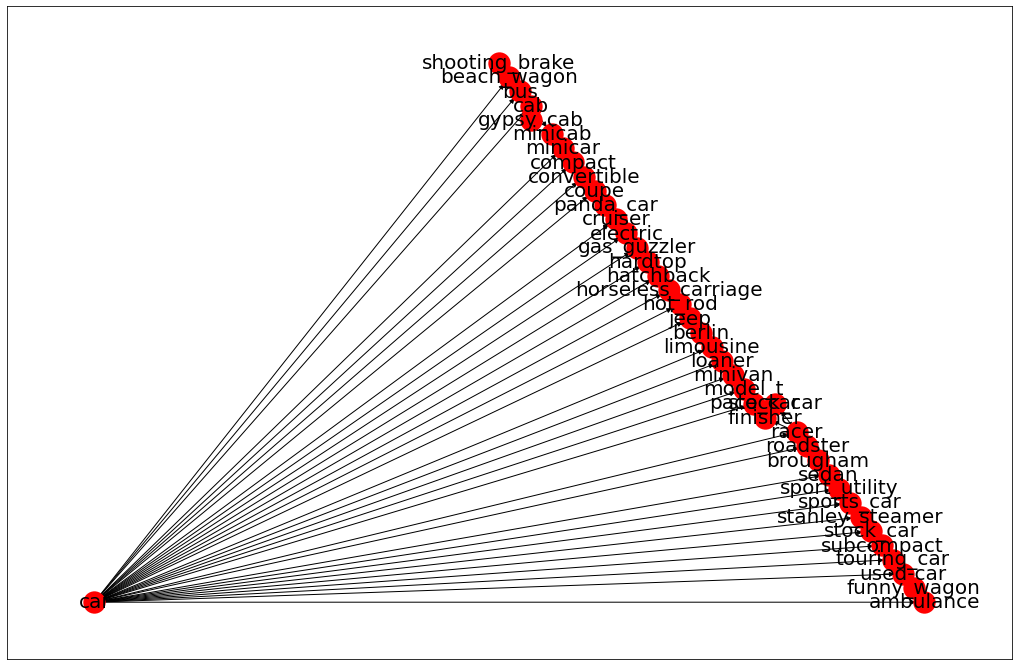

In [75]:
G, labels = closure_graph(ss[0], fn = lambda s: s.hyponyms())
draw_text_graph(G, labels)

## Hypernyms: conceptos que son mas generales!

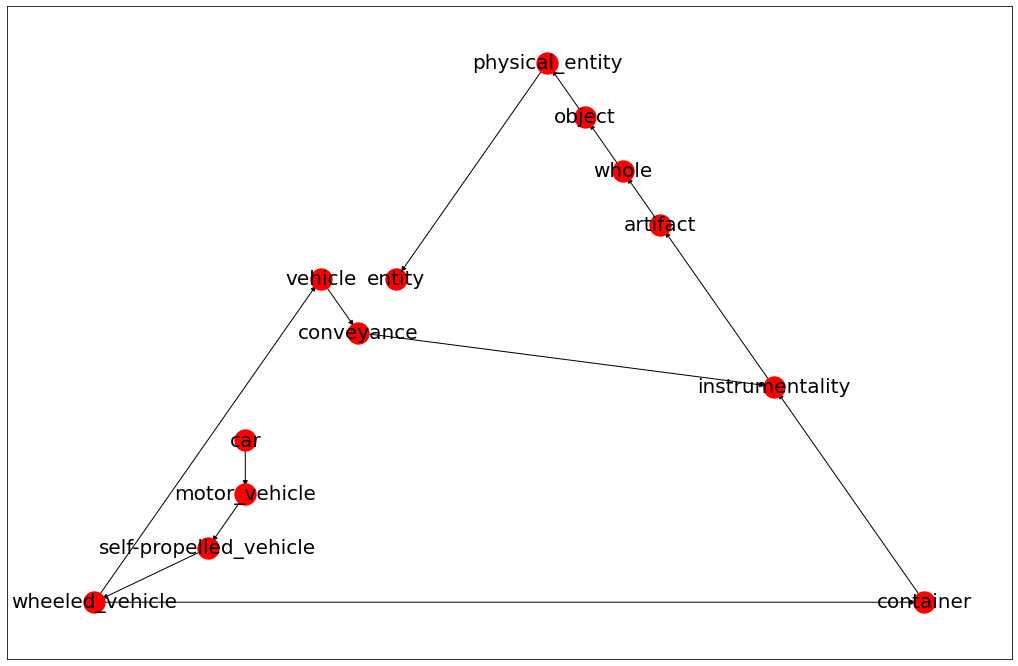

In [76]:
G, labels = closure_graph(ss[0], fn = lambda s: s.hypernyms())
draw_text_graph(G, labels)

## Similitud semantica

In [77]:
def show_syns(word):
  ss = wn.synsets(word, lang='spa')
  for syn in ss:
    print(f'{syn.name()}: {syn.definition()}')
    for name in syn.lemma_names():
      print(' * ', name)
  return ss

In [78]:
ss = show_syns('perro')

dog.n.01: a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
 *  dog
 *  domestic_dog
 *  Canis_familiaris
rotter.n.01: a person who is deemed to be despicable or contemptible
 *  rotter
 *  dirty_dog
 *  rat
 *  skunk
 *  stinker
 *  stinkpot
 *  bum
 *  puke
 *  crumb
 *  lowlife
 *  scum_bag
 *  so-and-so
 *  git


In [79]:
ss2 = show_syns('gato')

cat.n.01: feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
 *  cat
 *  true_cat
tom.n.02: male cat
 *  tom
 *  tomcat
dodger.n.01: a shifty deceptive person
 *  dodger
 *  fox
 *  slyboots


In [80]:
ss3 = show_syns('animal')

animal.n.01: a living organism characterized by voluntary movement
 *  animal
 *  animate_being
 *  beast
 *  brute
 *  creature
 *  fauna
beast.n.02: a cruelly rapacious person
 *  beast
 *  wolf
 *  savage
 *  brute
 *  wildcat
dunce.n.01: a stupid person; these words are used to express a low opinion of someone's intelligence
 *  dunce
 *  dunderhead
 *  numskull
 *  blockhead
 *  bonehead
 *  lunkhead
 *  hammerhead
 *  knucklehead
 *  loggerhead
 *  muttonhead
 *  shithead
 *  dumbass
 *  fuckhead


In [81]:
perro = ss[0]
gato = ss2[0]
animal = ss3[0]

In [82]:
animal.path_similarity(perro)

0.3333333333333333

In [83]:
gato.path_similarity(perro)

0.2

In [84]:
animal.path_similarity(gato)

0.125

In [85]:
perro.path_similarity(perro)

1.0

## Procesar texto plano desde Web

In [86]:
nltk.download('punkt')
from nltk import word_tokenize
from urllib import request

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [87]:
url = 'http://www.gutenberg.org/files/2554/2554-0.txt'
response = request.urlopen(url)

In [88]:
raw = response.read().decode('utf-8')
raw

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.org\r\n\r\n\r\nTitle: Crime and Punishment\r\n\r\nAuthor: Fyodor Dostoevsky\r\n\r\nRelease Date: March 28, 2006 [EBook #2554]\r\nLast Updated: October 27, 2016\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***\r\n\r\n\r\n\r\n\r\nProduced by John Bickers; and Dagny\r\n\r\n\r\n\r\n\r\n\r\nCRIME AND PUNISHMENT\r\n\r\nBy Fyodor Dostoevsky\r\n\r\n\r\n\r\nTranslated By Constance Garnett\r\n\r\n\r\n\r\n\r\nTRANSLATOR’S PREFACE\r\n\r\nA few words about Dostoevsky himself may help the English reader to\r\nunderstand his work.\r\n\r\nDostoevsky was the son of a doctor. His pa

In [89]:
len(raw)

1176967

In [90]:
tokens = word_tokenize(raw)
print(tokens[:20])

['\ufeffThe', 'Project', 'Gutenberg', 'EBook', 'of', 'Crime', 'and', 'Punishment', ',', 'by', 'Fyodor', 'Dostoevsky', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone']


In [91]:
text = nltk.Text(tokens)
text.collocations()

Katerina Ivanovna; Pyotr Petrovitch; Pulcheria Alexandrovna; Avdotya
Romanovna; Rodion Romanovitch; Marfa Petrovna; Sofya Semyonovna; old
woman; Project Gutenberg-tm; Porfiry Petrovitch; Amalia Ivanovna;
great deal; young man; Nikodim Fomitch; Ilya Petrovitch; Project
Gutenberg; Andrey Semyonovitch; Hay Market; Dmitri Prokofitch; Good
heavens


## Procesar HTML

In [92]:
import requests
from bs4 import BeautifulSoup
from nltk.tokenize import RegexpTokenizer
url = 'http://www.gutenberg.org/files/2701/2701-h.htm'

In [93]:
r = requests.get(url)

In [94]:
html = r.text
html

'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n <meta charset="UTF-8"/>\n\n<title>404 | Project Gutenberg</title>\n <link rel="stylesheet" href="/gutenberg/style.css?v=1.1">\n <link rel="stylesheet" href="/gutenberg/collapsible.css?1.1">\n <link rel="stylesheet" href="/gutenberg/new_nav.css?v=1.321231">\n<link rel="stylesheet" href="/gutenberg/pg-desktop-one.css">\n <meta name="viewport" content="width=device-width, initial-scale=1">\n <meta name="keywords" content="books, ebooks, free, kindle, android, iphone, ipad"/>\n <meta name="google-site-verification" content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io"/>\n <meta name="alexaVerifyID" content="4WNaCljsE-A82vP_ih2H_UqXZvM"/>\n <link rel="copyright" href="https://www.gnu.org/copyleft/fdl.html"/>\n <link rel="shortcut icon" href="/gutenberg/favicon.ico?v=1.1"/>\n\n <meta property="og:title"        content="Project Gutenberg" />\n <meta property="og:type"         content="website" />\n <meta property="og:u

In [95]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>404 | Project Gutenberg</title>
<link href="/gutenberg/style.css?v=1.1" rel="stylesheet"/>
<link href="/gutenberg/collapsible.css?1.1" rel="stylesheet"/>
<link href="/gutenberg/new_nav.css?v=1.321231" rel="stylesheet"/>
<link href="/gutenberg/pg-desktop-one.css" rel="stylesheet"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="books, ebooks, free, kindle, android, iphone, ipad" name="keywords">
<meta content="wucOEvSnj5kP3Ts_36OfP64laakK-1mVTg-ptrGC9io" name="google-site-verification"/>
<meta content="4WNaCljsE-A82vP_ih2H_UqXZvM" name="alexaVerifyID"/>
<link href="https://www.gnu.org/copyleft/fdl.html" rel="copyright">
<link href="/gutenberg/favicon.ico?v=1.1" rel="shortcut icon">
<meta content="Project Gutenberg" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://www.gutenberg.org/" property="og:url"/>
<meta 

In [96]:
text = soup.get_text()

tokens = re.findall('\w+', text)
tokens[:50]

['404',
 'Project',
 'Gutenberg',
 'Menu',
 'About',
 'About',
 'Project',
 'Gutenberg',
 'Collection',
 'Development',
 'Contact',
 'Us',
 'History',
 'Philosophy',
 'Permissions',
 'License',
 'Privacy',
 'Policy',
 'Terms',
 'of',
 'Use',
 'Search',
 'and',
 'Browse',
 'Book',
 'Search',
 'Bookshelves',
 'Frequently',
 'Downloaded',
 'Offline',
 'Catalogs',
 'Help',
 'All',
 'help',
 'topics',
 'Copyright',
 'Procedures',
 'Errata',
 'Fixes',
 'and',
 'Bug',
 'Reports',
 'File',
 'Formats',
 'Frequently',
 'Asked',
 'Questions',
 'Policies',
 'Public',
 'Domain']

## Construyendo codigo estructurado (con funciones)

In [97]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
filepath = '/content/drive/My Drive/Colab Notebooks/NLP_course_resources/'

In [99]:
def get_text(file):
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub(r'\s+>', ' ', text)
    return text

In [100]:
get_text(filepath+'book.txt')

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Crime and Punishment\n\nAuthor: Fyodor Dostoevsky\n\nRelease Date: March 28, 2006 [EBook #2554]\nLast Updated: October 27, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***\n\n\n\n\nProduced by John Bickers; and Dagny\n\n\n\n\n\nCRIME AND PUNISHMENT\n\nBy Fyodor Dostoevsky\n\n\n\nTranslated By Constance Garnett\n\n\n\n\nTRANSLATOR’S PREFACE\n\nA few words about Dostoevsky himself may help the English reader to\nunderstand his work.\n\nDostoevsky was the son of a doctor. His parents were very hard-working\nand deeply religious people, but so poor that they lived with 

In [101]:
!touch /content/drive/My\ Drive/Colab\ Notebooks/NLP_course_resources/read.py

In [102]:
import sys
sys.path.append(filepath)
sys.path

['',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/drive/My Drive/Colab Notebooks/NLP_course_resources/']

In [103]:
import read
read.get_text(filepath+'book.txt')

'\ufeffThe Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Crime and Punishment\n\nAuthor: Fyodor Dostoevsky\n\nRelease Date: March 28, 2006 [EBook #2554]\nLast Updated: October 27, 2016\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***\n\n\n\n\nProduced by John Bickers; and Dagny\n\n\n\n\n\nCRIME AND PUNISHMENT\n\nBy Fyodor Dostoevsky\n\n\n\nTranslated By Constance Garnett\n\n\n\n\nTRANSLATOR’S PREFACE\n\nA few words about Dostoevsky himself may help the English reader to\nunderstand his work.\n\nDostoevsky was the son of a doctor. His parents were very hard-working\nand deeply religious people, but so poor that they lived with 

In [104]:
'''
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url n):
  req = request.urlopen(url)
  html = req.read().decode('utf8')
  raw = BeautifulSoup(html, 'html.parser')
  text = raw.get_text()
  tokens = word_tokenize(text)
  tokens = [t.lower() for t in tokens]
  fd = nltk.FreqDist(tokens)
  return [t for (t, _) in fd.most_common(n)]
'''

"\nfrom urllib import request\nfrom bs4 import BeautifulSoup\n\ndef freq_words(url n):\n  req = request.urlopen(url)\n  html = req.read().decode('utf8')\n  raw = BeautifulSoup(html, 'html.parser')\n  text = raw.get_text()\n  tokens = word_tokenize(text)\n  tokens = [t.lower() for t in tokens]\n  fd = nltk.FreqDist(tokens)\n  return [t for (t, _) in fd.most_common(n)]\n"